<a href="https://colab.research.google.com/github/davetice/python_engineering/blob/main/linearODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.linalg as scln 
import time
# create a matrix
N = 500
A = 0.1*np.random.rand(N,N)
t = 0.01
# compute the exponential with scipy
t0 = time.perf_counter()
expA_scipy = scln.expm(A)
t1 = time.perf_counter()
# compute the exponential directly
t2 = time.perf_counter()
Lambda, U = np.linalg.eig(A)
expA_direct = np.dot(U,np.dot(np.diag(np.exp(Lambda)),np.linalg.inv(U))) 
t3 = time.perf_counter()
# compute the error and print the performance
error = np.abs(np.sum(expA_scipy-expA_direct))/N/N
if error < 1E-3:
  print ('Scipy %1.6f sec. \t Direct %1.6f', ((t1-t0),(t3-t2)))
else:
  print ('error %1.6e', (error))
  

Scipy %1.6f sec. 	 Direct %1.6f (0.12493233399999326, 0.6680069900000376)


[[ 0.          0.          0.81649658]
 [ 0.70710678 -0.83205029 -0.40824829]
 [-0.70710678 -0.5547002  -0.40824829]]


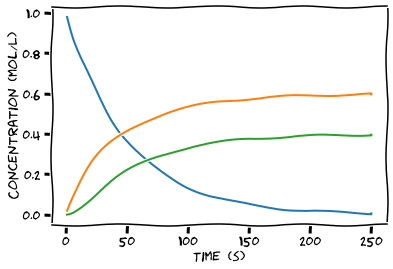

In [ ]:
import numpy as np # rate constants
import matplotlib.pyplot as plt

k1, k2, k3, k4 = 1, 0, 2, 3
# initial condition
C0 = np.array([1,0,0])
mymatrix = np.array([])
newArray = np.array([])
xValues = np.array([])
yValues1 = np.array([])
yValues2 = np.array([])
yValues3 = np.array([])
# evolution time
tmax, nT = 5.0, 251
dT = tmax/(nT-1)
# matrix of the rates
K = np.array([[-1,0,0],[1,-2,3],[0,2,-3]])
# compute the exponential of the matrix
Lambda, U = np.linalg.eig(K)
print(U)
eKdt = np.dot(U,np.dot(np.diag(np.exp(Lambda*dT)),np.linalg.inv(U)))
# loop over the different time steps
for i in range(1,nT):
  C0 = np.dot(eKdt,np.array(C0))
  #newArrary = np.append(newArrary,i)
  mymatrix = np.append(mymatrix, i)k
  mymatrix = np.append(mymatrix, C0)
#print(mymatrix)
for x in range(0,len(mymatrix),4):
  #print(mymatrix[x])
  xValues = np.append(xValues,mymatrix[x])
  yValues1 = np.append(yValues1,mymatrix[x+1])
  yValues2 = np.append(yValues2,mymatrix[x+2])
  yValues3 = np.append(yValues3,mymatrix[x+3])

#print(xValues)
#print(yValues1)
plt.xlabel("Time (s)")
plt.ylabel(("Concentration (mol/L)"))
plt.xkcd()
plt.plot(xValues,yValues1,xValues, yValues2,xValues,yValues3)
plt.show()

[[1.        ]
 [1.12215284]
 [1.24261203]
 [1.3599266 ]
 [1.47292262]
 [1.58069959]
 [1.68261258]
 [1.77824531]
 [1.86737861]
 [1.94995736]
 [2.02605862]
 [2.09586192]
 [2.15962297]
 [2.21765106]
 [2.27029015]
 [2.31790345]
 [2.36086127]
 [2.39953157]
 [2.43427295]
 [2.46542958]
 [2.49332776]
 [2.5182738 ]
 [2.54055286]
 [2.56042856]
 [2.57814321]
 [2.59391843]
 [2.60795604]
 [2.62043915]
 [2.6315334 ]
 [2.6413882 ]
 [2.65013801]
 [2.65790358]
 [2.66479315]
 [2.67090359]
 [2.67632149]
 [2.68112415]
 [2.68538049]
 [2.68915192]
 [2.69249312]
 [2.69545271]
 [2.69807392]
 [2.70039516]
 [2.70245054]
 [2.70427035]
 [2.70588145]
 [2.70730768]
 [2.70857016]
 [2.70968763]
 [2.7106767 ]
 [2.71155208]]


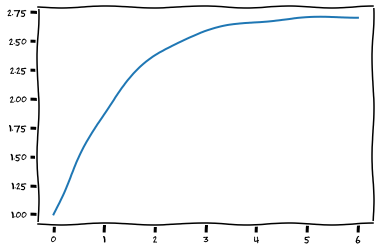

In [ ]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt
def f(y,t):
  dydt = y * np.exp(-t)
  return dydt
t = np.linspace(0,6)
y0 = 1.0
y = odeint(f, y0,t)
print (y)

plt.plot(t, y)

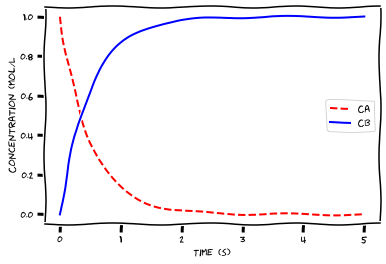

In [ ]:
def rxn(C, t):
  Ca = C[0]
  Cb = C[1]
  k = 2.0
  dAdt = -k *Ca
  dBdt = k * Ca

  return [dAdt, dBdt]

t = np.linspace(0,5, 100)
C0 = [1,0]
C = odeint(rxn, C0, t)

plt.plot(t, C[:,0],'r--',linewidth=2.0)
plt.plot(t, C[:,1],'b-',linewidth=2.0)
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/L')
plt.legend(['Ca','Cb'])


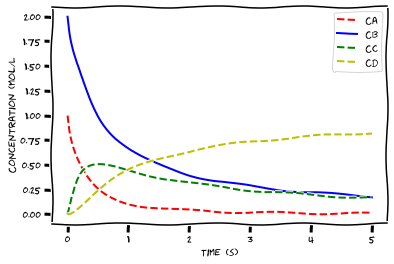

In [ ]:
def rxnNet(C, t):
  Ca = C[0]
  Cb = C[1]
  Cc = C[2]
  Cd = C[3]
  k1 = 2.0
  k2 = 1.0
  dAdt = -k1 *Ca * Cb
  dBdt = -k1 * Ca * Cb - k2 * Cb * Cc
  dCdt = k1 * Ca * Cb - k2 * Cb * Cc
  dDdt = k2 * Cb * Cc
  return [dAdt, dBdt, dCdt, dDdt]

  t = np.linspace(0,5, 100)
C0 = [1,2,0,0]
C = odeint(rxnNet, C0, t)

plt.plot(t, C[:,0],'r--',linewidth=2.0)
plt.plot(t, C[:,1],'b-',linewidth=2.0)
plt.plot(t, C[:,2],'g--',linewidth=2.0)
plt.plot(t, C[:,3],'y--',linewidth=2.0)
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/L')
plt.legend(['Ca','Cb', 'Cc', 'Cd'])